In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
import logging
import numpy as np

import xarray as xr
import xarray.ufuncs as xu
import xrft
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

from cross_defPlot import *
from cross_compute import *

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, silence_logs='error', protocol = 'tcp://',
                      host = '137.129.155.67')
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:35923,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:41621,Total threads: 4
Dashboard: http://137.129.155.67:34151/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
### Parameter for the analysis
year = 2009
latitude = 10.5
longitude = 179

wave = ['TCWV_Kelvin','OLR_Kelvin']
coeff = 2

day1 = '2009-08-20'
day2 = '2009-09-10'

ds_RAW, ds_VAR, ds_FILTER = openDATA(year)

In [3]:
### Compute standard deviation
ds_VAR_mean = ds_VAR.mean().compute()
ds_std_mean = ds_VAR_mean**(0.5)
ds_std = ds_VAR**(0.5)
for w in wave:
    ds_FILTER = addNegative(ds_FILTER, ds_std, w)
    
ds_FILTER = ds_FILTER.sel(lat = slice(0,20), lon = slice(130,260))  

# Vision en 1D en différents points du globe
On selectionne des données en plein ocean et sur le continent dans la bande équatoriale

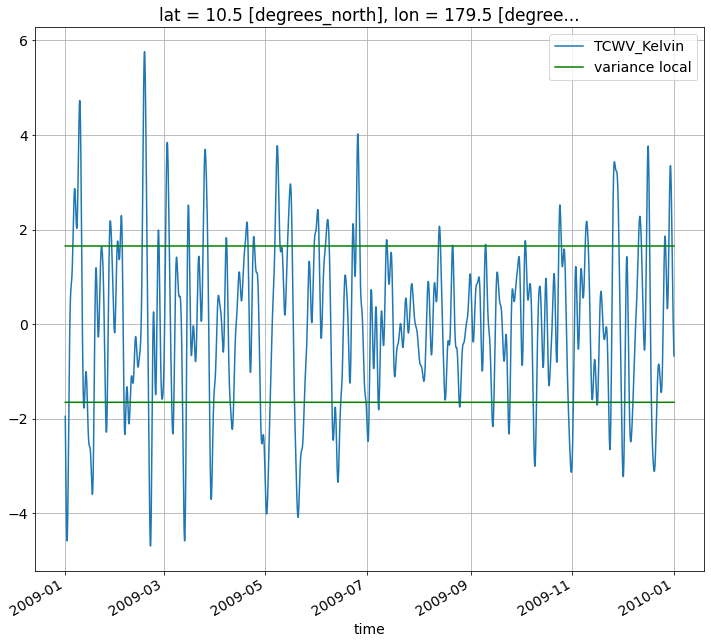

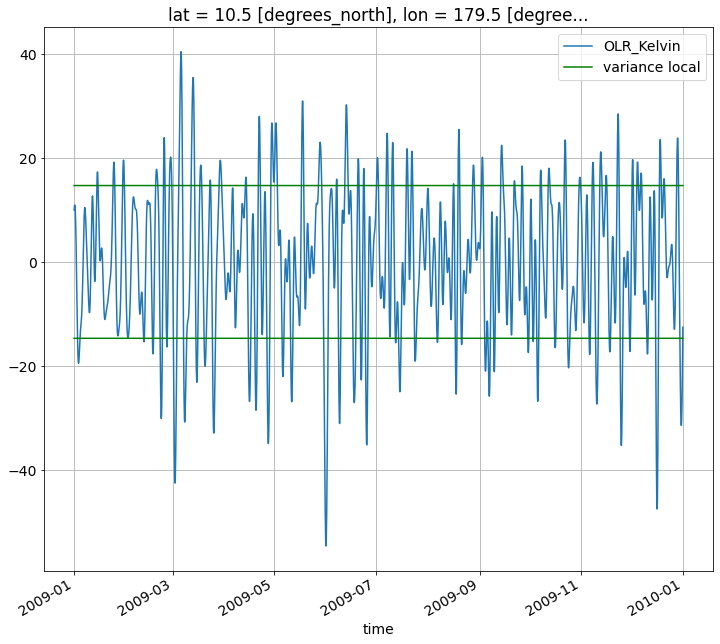

In [4]:
for w in wave:
    plotline1D(ds_FILTER, latitude, longitude, w)


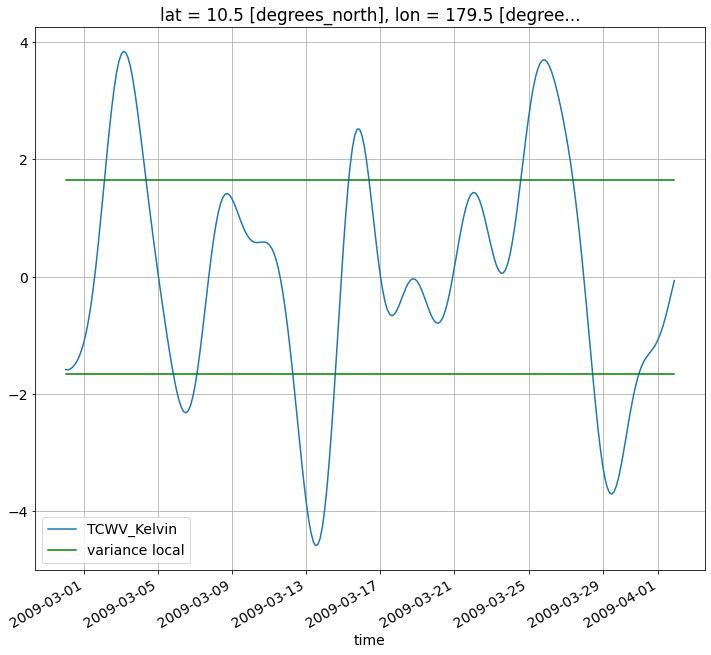

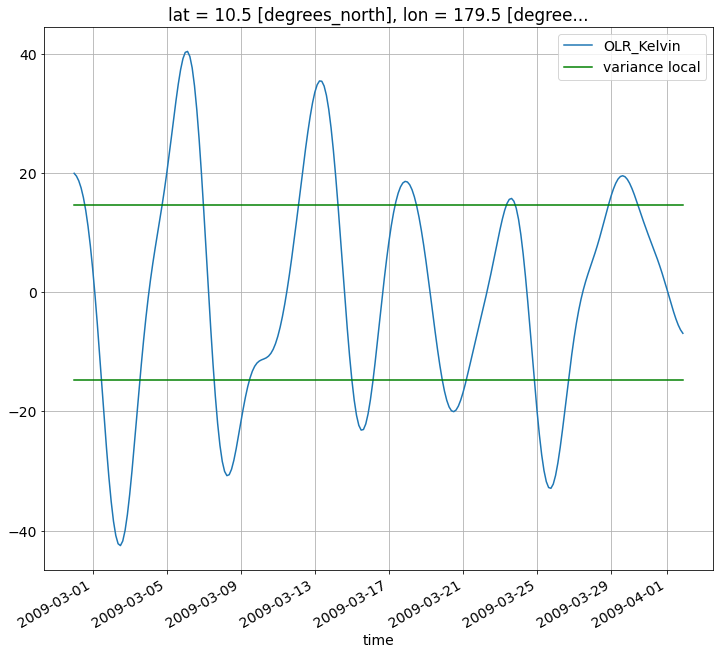

In [5]:
_ds_FILTER = ds_FILTER.sel(time = slice('2009-02-28','2009-04-01'))
for w in wave:
    plotline1D(_ds_FILTER, latitude, longitude, w)


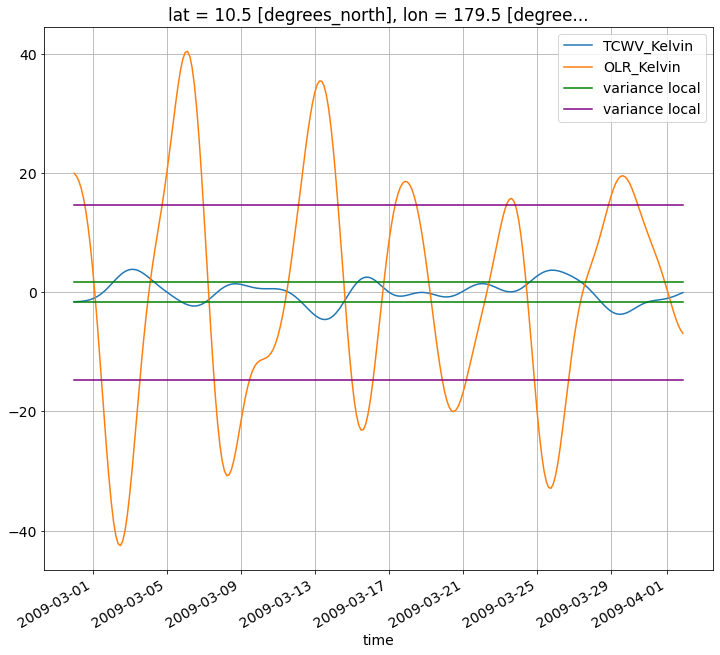

In [6]:
wave1 = wave[0]
wave2 = wave[1]
plotline1D_2V(_ds_FILTER, latitude, longitude, wave1, wave2)    

# Garder uniquement les valeurs supérieur-inférieur à une valeur cible
Dans un premier temps on garde par rapport à l'anomalie filtré puis par rapport à l'anomalie

### Par rapport à l'anomalie filtré

In [4]:
wave1 = wave[0]
wave2 = wave[1]
ds_FILTER = keepData(ds_FILTER, coeff, wave1, wave2)
ds_FILTER

<xarray.Dataset>
Dimensions:                          (lat: 20, time: 2920, lon: 130)
Coordinates:
  * lat                              (lat) float64 0.5 1.5 2.5 ... 18.5 19.5
  * time                             (time) datetime64[ns] 2009-01-01 ... 200...
  * lon                              (lon) float32 130.5 131.5 ... 258.5 259.5
Data variables: (12/24)
    TCWV_Kelvin                      (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_Rossby                      (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_MJO                         (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_MRG                         (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_EIG                         (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_WIG                         (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    ...                               ...
    STD_OLR_Kelvin                   (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    STD_OLR_Kelvin_N                 (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_Kelvin_sum_TS               (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_Kelvin_below_TS             (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_Kelvin_above_TS             (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>
    TCWV_Kelvin_cross_OLR_Kelvin_TS  (time, lat, lon) float64 dask.array<chunksize=(1, 20, 130), meta=np.ndarray>

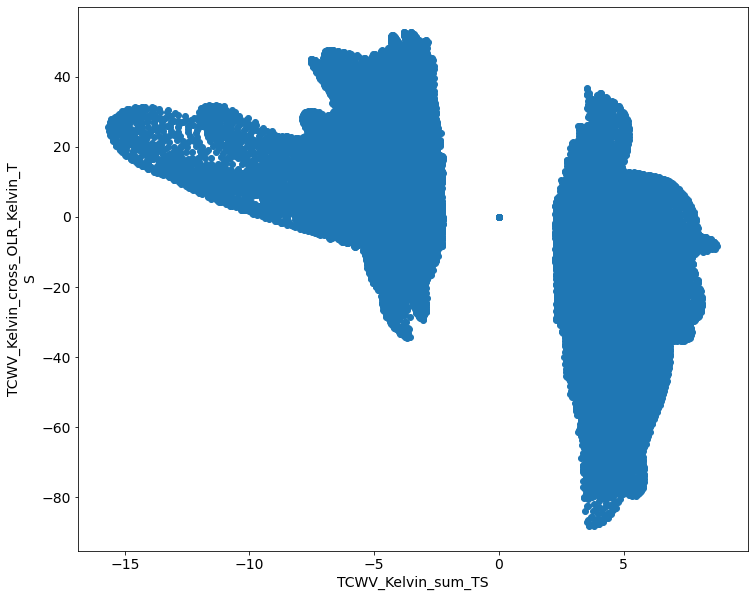

In [6]:
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'TCWV_Kelvin_sum_TS', y = 'TCWV_Kelvin_cross_OLR_Kelvin_TS')

In [9]:
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'ano_sum_TS_TOT', y = wave + '_ano_TS_TOT')

TypeError: can only concatenate list (not "str") to list

In [ ]:
ds_FILTER

### Par rapport à l'anomalie

In [ ]:
_da_nb_jour, _da_nb_jour_N = computeDayBelowAbove(ds_FILTER,ds_std,coeff, wave)